In [306]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mc

from heapq import heappush, heappop
from bisect import bisect, insort

from ipywidgets import interact
from tqdm import tqdm

from src.dsu import DSU
from src.instance import Instance, INSTANCE_DIR
from src.astar import State
from src.solver import *
from src.check import check_solution
from src.util import *
from src.grid_proc import *

In [3]:
def stats(I, segs=False):
    print(I.name, I.nbots, I.nobs)
    
    Mo = mat_of(I.obstacles, I.bbox)
    Ms = mat_of(I.starts, I.bbox)
    Mt = mat_of(I.targets, I.bbox)
    
    fig, ax = plt.subplots(1,3, figsize=(15,5))
    ax[0].imshow((Mo + 2*Ms).T, origin='lower')
    ax[1].imshow((Mo + 2*Mt).T, origin='lower')
    
    s,t,o = map(np.array, [I.starts, I.targets, I.obstacles])
    delta = t - s
    
    if segs:
        lc = np.stack([s,t], 1)
        lc0 = mc.LineCollection( lc )
        lc1 = mc.LineCollection( lc )
        ax[0].add_collection(lc0)
        ax[1].add_collection(lc1)
    
    ax[2].scatter(*delta.T, s=3)
    
    plt.show()

def load(fname, segs):
    global I
    I = Instance.from_file(fname)
    stats(I, segs)

fnames = os.listdir(INSTANCE_DIR)
interact(load, fname=fnames, segs=False);

interactive(children=(Dropdown(description='fname', options=('election_109.instance.json', 'small_free_001_10x…

In [7]:
from src.solver import Solver1

opt = {
    'universe_bgradiation_00009_100x100_80_8000': .08,
    'election_109': .5,
    'large_free_002_100x100_20_2000': .2,
    'london_night_00004_50x50_50_1250': .1,
}

sv = Solver1()
ans = sv.solve(I, pad=60, th=.03)

100%|██████████| 110/110 [00:01<00:00, 80.23it/s]


0 infinite loop
1 infinite loop
2 infinite loop
107 3 110 3975


In [8]:
sol = { 'instance': I.name, 'steps': ans }
print(len(ans))

1099


In [415]:
if check_solution(I,sol):
    json.dump(sol, open(f'solutions/{I.name}.sol.json','w'))

In [12]:
# move length
sv.sol3??
# plt.hist( list(map(len, mv)), bins=20 );

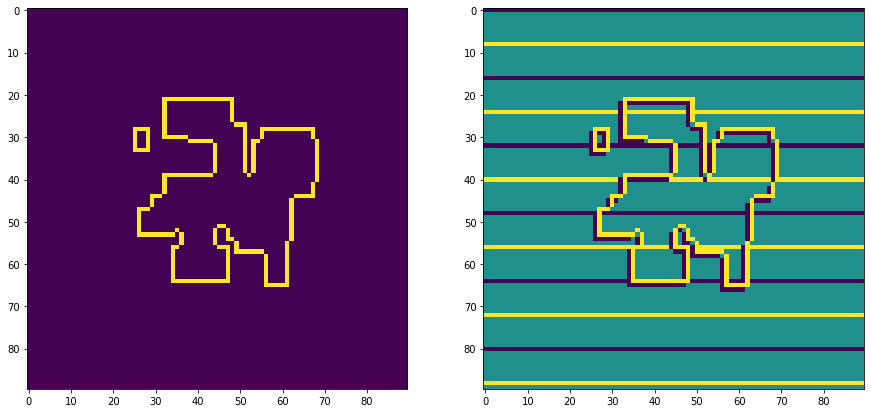

In [390]:
def show_hw(I, pad=20):
    Mobs = np.pad(mat_of(I.obstacles, I.bbox), pad)
    Mhw = get_highway(Mobs)

    fig,ax = plt.subplots(1,2, figsize=(15,10))
    ax[0].imshow(Mobs)
    ax[1].imshow(np.clip(Mhw[:,:,2],0,3))
    plt.show()
show_hw(I) # medium_013_50x50_90_1141

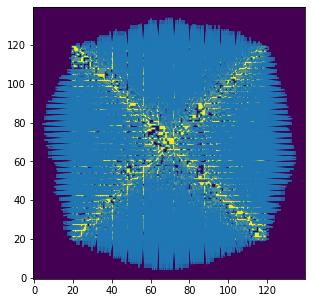

In [350]:
M = mat_of(I.starts, I.bbox)
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.imshow(np.pad(M.T, origin='lower')

lc = np.stack([src, dst], 1)
lc0 = mc.LineCollection( lc )
ax.add_collection(lc0)

(70, 70) (70, 70)


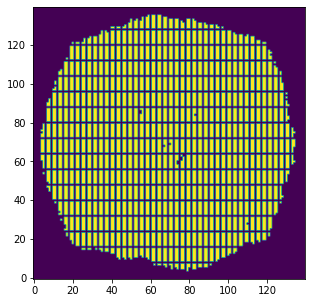

In [353]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
M = np.pad(I.get_mat('starts'), pad)

for _,b in pq:
    s = src[b]
    d = dst[b]
    M[s] = 0
    M[d] = 4
print(s,d)

ax.imshow(M, origin='lower')
lc = np.stack([src, dst], 1)
lc0 = mc.LineCollection( lc )
# ax.add_collection(lc0)

#ax.set_ylim(105,115)
#ax.set_xlim(25,35)

In [318]:
"""
mapping x to y
with union set (DSU)
we find cycles and disjoin paths in precedence graph
so we know who has to leave before who arrives
"""
dsu = DSU(I.nbots)

_d = { x:i for i,x in enumerate(d1) }
for i in range(I.nbots):
    x = d2[i] # i arrives
    if x in _d:
        j = _d[x] # j goes
        dsu.merge(j,i) # j before i

G = dsu.get_groups()

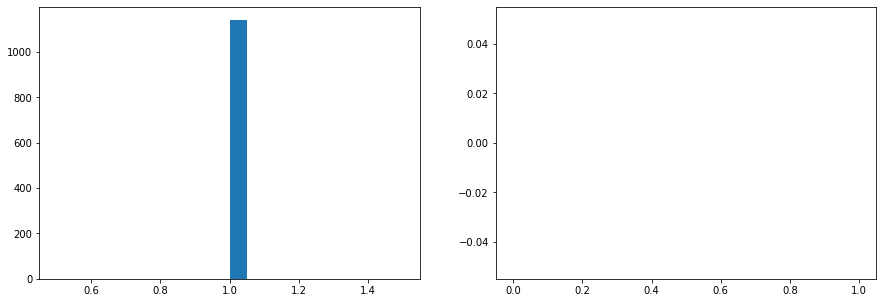

In [394]:
def check_cycles(src, dst):
    PG = PrecedenceGraph(src, dst)
    
    fig, ax = plt.subplots(1,2, figsize=(15,5))
    simple = [ len(p) for p,c in PG.groups if not c ]
    cycles = [ len(p) for p,c in PG.groups if c ]
    ax[0].hist(simple, bins=20)
    ax[1].hist(cycles, bins=20)
    plt.show()
    # few cycles :)

check_cycles(sv.sol3.src, sv.sol3.dst)

election_109 109 0


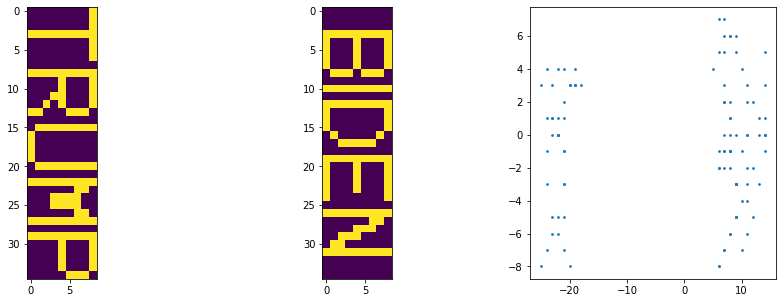

small_free_001_10x10_40_40 40 0


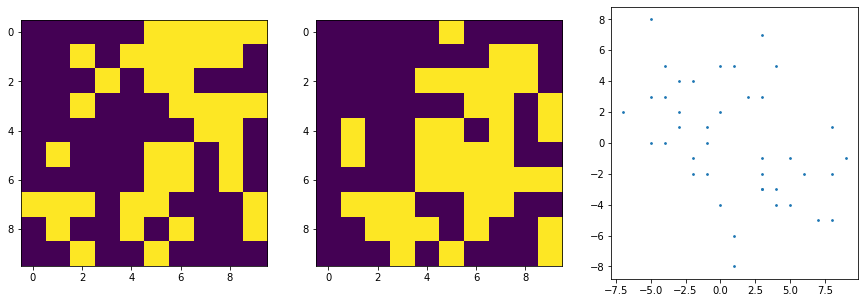

galaxy_cluster_00000_20x20_20_80 80 0


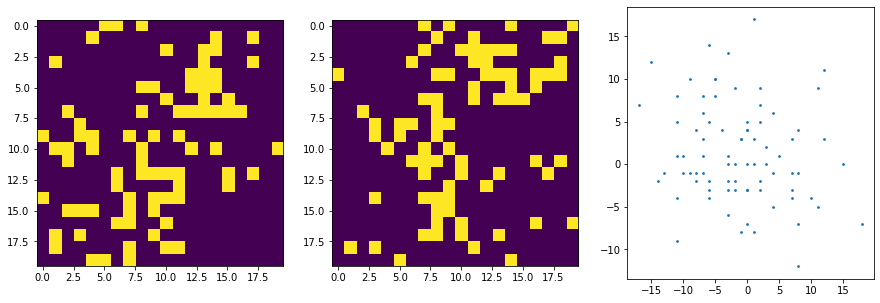

london_night_00004_50x50_50_1250 1250 0


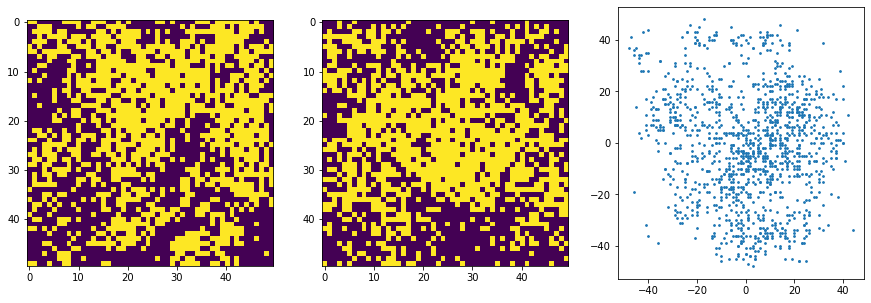

socg2021_108 108 0


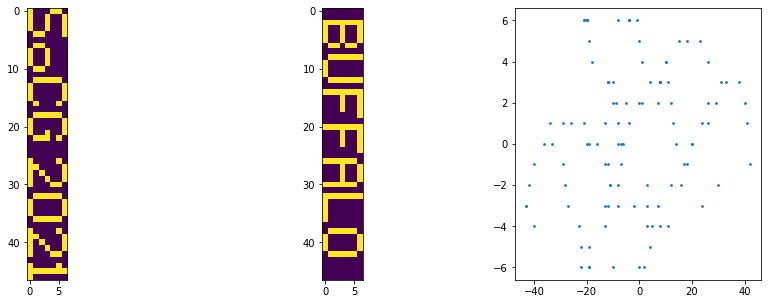

medium_013_50x50_90_1141 1141 251


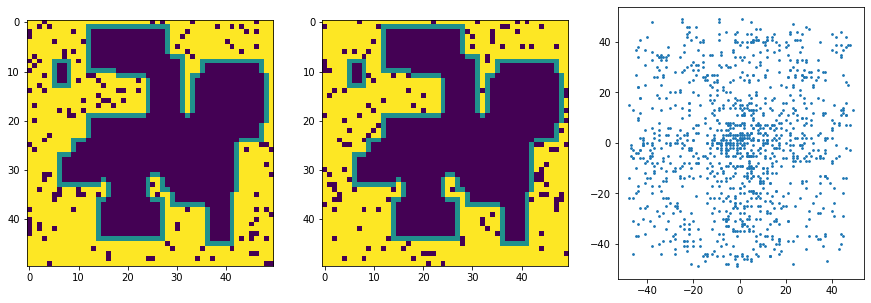

small_free_000_10x10_30_30 30 0


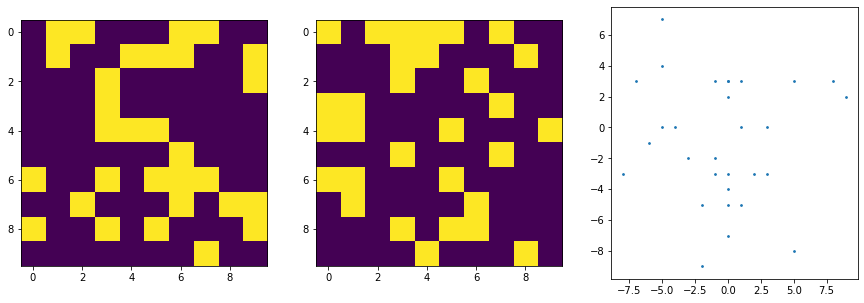

small_001_10x10_40_30 30 20


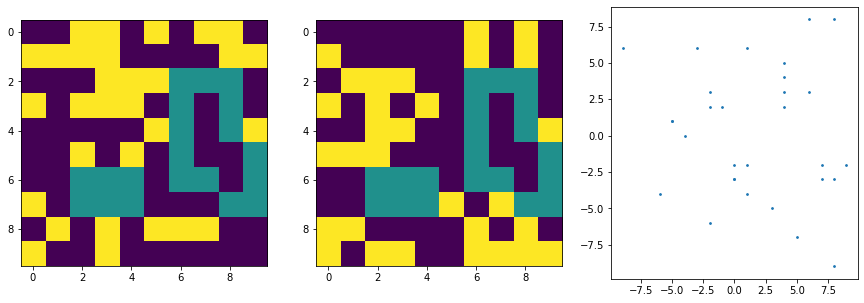

universe_bgradiation_00009_100x100_80_8000 8000 0


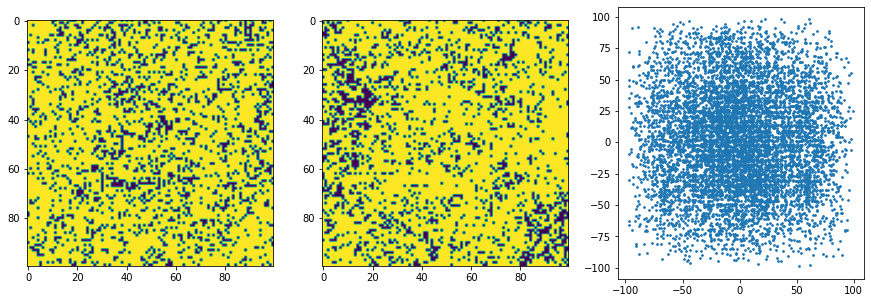

buffalo_000_25x25_20_63 63 98


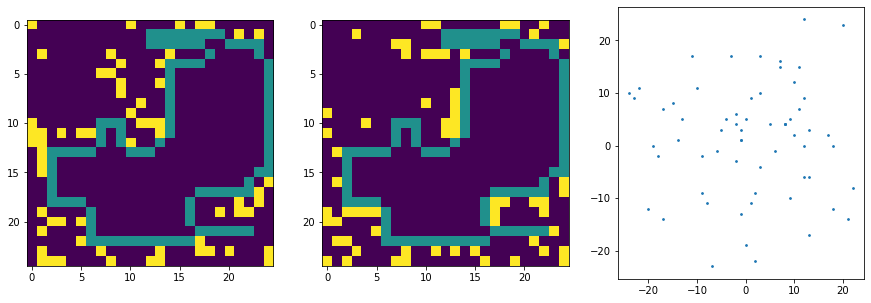

microbes_00000_20x20_60_110 110 73


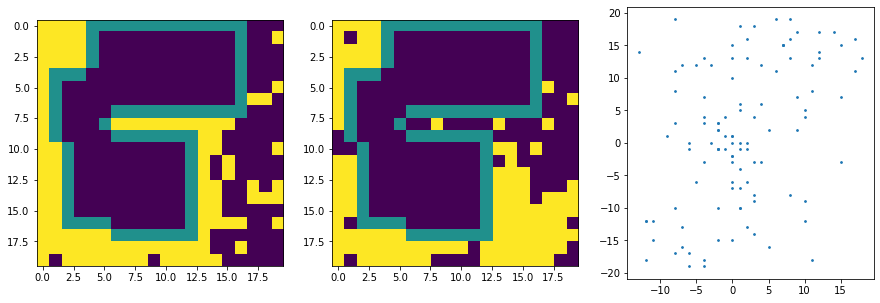

galaxy_cluster2_00003_50x50_25_625 625 0


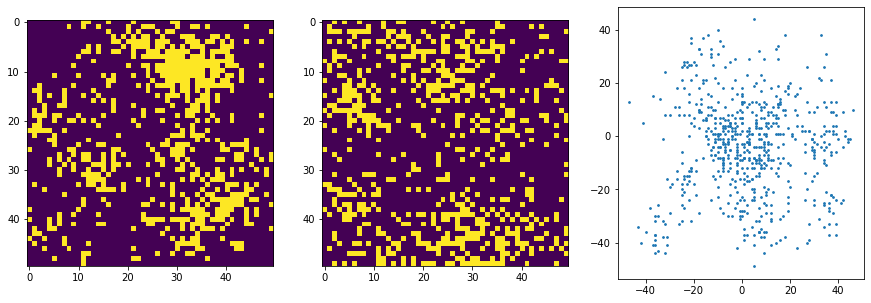

redblue_00000_20x20_30_113 113 22


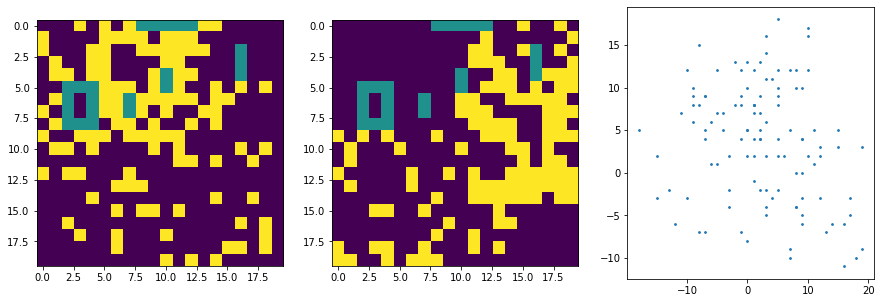

small_000_10x10_20_10 10 27


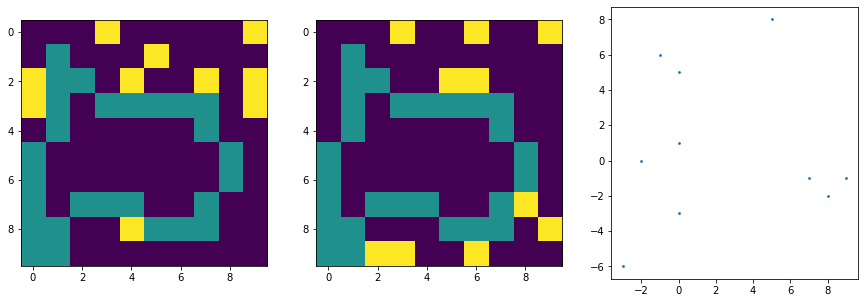

the_king_94 94 0


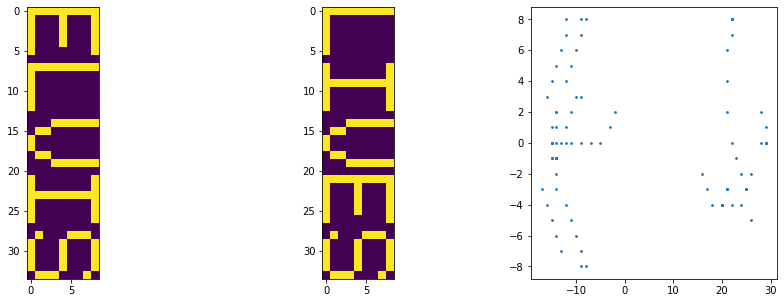

medium_free_013_50x50_50_1250 1250 0


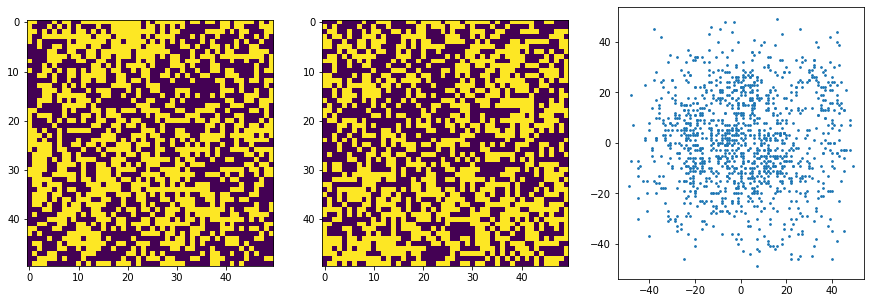

large_002_100x100_30_1692 1692 575


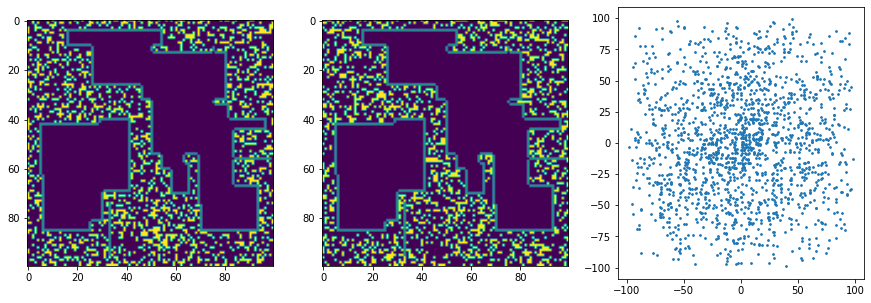

large_free_002_100x100_20_2000 2000 0


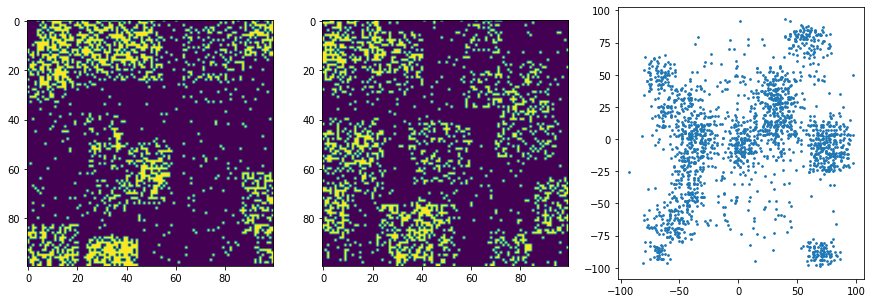

In [29]:
""" all instances """

for fname in fnames:
    I = Instance.from_file(fname)
    
    print(I.name, I.nbots, I.nobs)
    
    
    fig, ax = plt.subplots(1,3, figsize=(15,5))
    ax[0].imshow(I.get_mat('starts'))
    ax[1].imshow(I.get_mat('targets'))
    
    s,t,o = map(np.array, [I.starts, I.targets, I.obstacles])
    delta = t - s
    
    # ax[2].set_xlim(I.bbox[1])
    # ax[2].set_ylim(I.bbox[0])
    lc = np.stack([I.starts, I.targets], 1)
    lc = mc.LineCollection( lc )
    # ax[2].add_collection(lc)
    ax[2].scatter(*delta.T, s=3)
    
    plt.show()